In [1]:
%load_ext kedro.ipython


[12/12/24 19:41:50] INFO     Using                                                                  ]8;id=984649;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=394262;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/framework/project/__init__.py#249\249]8;;\
                             '/home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro                
                             /framework/project/rich_logging.yml' as logging configuration.                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=53398;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=678766;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=529200;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=160828;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=755288;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=353583;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#175\175]8;;\
                             /home/mayank/sem7/MLprod/final_project/fantasy.                                       
                             To set a different path, run '%reload_kedro <project_root>'                           

[12/12/24 19:41:51] INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=174251;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/framework/hooks/mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=911640;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/framework/hooks/mlflow_hook.py#62\62]8;;\

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=861941;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/config/kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=993431;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro_mlflow/config/kedro_mlflow_config.py#260\260]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///home/mayank/sem7/MLprod/final_project/fantasy/mlru                           
                             ns'                                                                                   

[12/12/24 19:41:53] WARNING  /home/mayank/.local/lib/python3.10/site-packages/tqdm/auto.py:21:      ]8;id=816807;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=770962;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/warnings.py#109\109]8;;\
                             TqdmWarning: IProgress not found. Please update jupyter and                           
                             ipywidgets. See                                                                       
                             https://ipywidgets.readthedocs.io/en/stable/user_install.html                         
                               from .autonotebook import tqdm as notebook_tqdm                                     
                                                                                                                   

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=770511;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=96364;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:41:55] INFO     Kedro project fantasy                                                  ]8;id=845395;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=418800;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=758143;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=926269;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[12/12/24 19:41:56] INFO     Registered line magic 'run_viz'                                        ]8;id=492178;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=87355;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/ipython/__init__.py#148\148]8;;\

In [2]:
!pip install -q torchcp
!pip install -q captum
!pip install -q pulp

# IMPORTS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.autograd import Variable
import torchcp

# CONTEXT LOADING 

In [4]:
matches_df = context.catalog.load("matches")
deliveries_df = context.catalog.load("deliveries")
bat_df = context.catalog.load("batsman_scorecard")
bowl_df = context.catalog.load("bowler_scorecard")
field_df = context.catalog.load("fielder_scorecard")
X_test_bat = context.catalog.load("X_test_bat") 
y_test_bat = context.catalog.load("y_test_bat") 
lstm_model_bat = context.catalog.load("lstm_model_bat")
X_test_bowl = context.catalog.load("X_test_bowl") 
lstm_model_bowl = context.catalog.load("lstm_model_bowl")
X_test_field = context.catalog.load("X_test_field") 
lstm_model_field = context.catalog.load("lstm_model_field")
X_cali_bat = context.catalog.load("X_cali_bat")
y_cali_bat = context.catalog.load("y_cali_bat")
split_predictor_bat = context.catalog.load("split_predictor_bat")
split_predictor_bowl = context.catalog.load("split_predictor_bowl")
split_predictor_field = context.catalog.load("split_predictor_field")
inference_output = context.catalog.load("inference_output")

[12/12/24 19:42:00] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=584874;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=393527;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:02] INFO     Loading data from matches (CSVDataset)...                          ]8;id=507380;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=218754;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=181153;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=481508;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:04] INFO     Loading data from deliveries (CSVDataset)...                       ]8;id=778682;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=869113;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

[12/12/24 19:42:05] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=498821;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=167075;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:08] INFO     Loading data from batsman_scorecard (CSVDataset)...                ]8;id=792008;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=81069;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=281242;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=796228;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:09] INFO     Loading data from bowler_scorecard (CSVDataset)...                 ]8;id=617225;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=503216;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=558214;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=236785;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:11] INFO     Loading data from fielder_scorecard (CSVDataset)...                ]8;id=507011;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=749551;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=765009;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=918369;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:13] INFO     Loading data from X_test_bat (CSVDataset)...                       ]8;id=478061;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=190654;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=744183;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=477367;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:15] INFO     Loading data from y_test_bat (CSVDataset)...                       ]8;id=912376;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=924182;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

[12/12/24 19:42:16] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=173872;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=229921;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:17] INFO     Loading data from lstm_model_bat (MlflowPickleDataset)...          ]8;id=189676;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=345066;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=431736;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=976546;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:20] INFO     Loading data from X_test_bowl (CSVDataset)...                      ]8;id=668626;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=69950;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=917202;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=714774;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:22] INFO     Loading data from lstm_model_bowl (MlflowPickleDataset)...         ]8;id=315976;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=788310;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=622802;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=408562;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:24] INFO     Loading data from X_test_field (CSVDataset)...                     ]8;id=333182;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=920961;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=791178;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=630900;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:26] INFO     Loading data from lstm_model_field (MlflowPickleDataset)...        ]8;id=772419;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=225301;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=649686;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=114785;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:28] INFO     Loading data from X_cali_bat (CSVDataset)...                       ]8;id=936119;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=521455;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=217586;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=85029;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:29] INFO     Loading data from y_cali_bat (CSVDataset)...                       ]8;id=82260;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=17673;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=53288;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=245189;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:31] INFO     Loading data from split_predictor_bat (MlflowPickleDataset)...     ]8;id=769379;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=857103;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=627145;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=161858;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:34] INFO     Loading data from split_predictor_bowl (MlflowPickleDataset)...    ]8;id=900535;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=658572;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=259300;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=138332;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:36] INFO     Loading data from split_predictor_field (MlflowPickleDataset)...   ]8;id=512864;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=717095;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=547256;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=501080;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:38] INFO     Loading data from inference_output (CSVDataset)...                 ]8;id=480237;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=483403;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

In [5]:
bat_df

,match_id,batter,runs,fours,sixes,balls_faced,player_team,opponent_team,strike_rate,batting_points,date,venue
0,548346,A Ashish Reddy,10,0,1,10,Deccan Chargers,Mumbai Indians,100.000000,12,2012-04-29,Wankhede Stadium
1,548352,A Ashish Reddy,3,0,0,3,Deccan Chargers,Chennai Super Kings,100.000000,3,2012-05-04,"MA Chidambaram Stadium, Chepauk"
2,548359,A Ashish Reddy,8,1,0,8,Deccan Chargers,Kings XI Punjab,100.000000,9,2012-05-08,"Rajiv Gandhi International Stadium, Uppal"
3,548373,A Ashish Reddy,10,2,0,4,Deccan Chargers,Rajasthan Royals,250.000000,12,2012-05-18,"Rajiv Gandhi International Stadium, Uppal"
4,548376,A Ashish Reddy,4,0,0,5,Deccan Chargers,Royal Challengers Bangalore,80.000000,4,2012-05-20,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...,...,...
16510,980903,Z Khan,4,1,0,9,Delhi Daredevils,Kolkata Knight Riders,44.444444,5,2016-04-10,Eden Gardens
16511,980993,Z Khan,2,0,0,4,Delhi Daredevils,Mumbai Indians,50.000000,2,2016-05-15,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
16512,1082595,Z Khan,1,0,0,1,Delhi Daredevils,Royal Challengers Bangalore,100.000000,1,2017-04-08,M.Chinnaswamy Stadium
16513,1082635,Z Khan,2,0,0,11,Delhi Daredevils,Mumbai Indians,18.181818,-4,2017-05-06,Feroz Shah Kotla


In [16]:
matches_df = matches_df.sort_values(by='date', ascending=False)
matches_df.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [ ]:
def get_match_players(match_id):
    print(f"\nmatch id : {match_id}")
    print(f"team1: {matches_df[matches_df['id'] == match_id]['team1']}")
    print(f"team2: {matches_df[matches_df['id'] == match_id]['team2']}")
    print(f"venue: {matches_df[matches_df['id'] == match_id]['venue']}")
    print(f"date: {matches_df[matches_df['id'] == match_id]['date']}")
    match_players = list(set(bat_df[bat_df['match_id'] == match_id]['batter'].unique()).union(
        set(bowl_df[bowl_df['match_id'] == match_id]['bowler'].unique()).union(
            set(field_df[field_df['match_id'] == match_id]['fielder'].unique())
        )
    ))
    print (f"players : {match_players}")
    return match_players



 match id : 1426312
team1: 1094    Sunrisers Hyderabad
Name: team1, dtype: object
team2: 1094    Kolkata Knight Riders
Name: team2, dtype: object
venue: 1094    MA Chidambaram Stadium, Chepauk, Chennai
Name: venue, dtype: object
date: 1094    2024-05-26
Name: date, dtype: object
players : ['Ramandeep Singh', 'H Klaasen', 'Abhishek Sharma', 'MA Starc', 'Shahbaz Ahmed', 'VG Arora', 'T Natarajan', 'Rahmanullah Gurbaz', 'SP Narine', 'RA Tripathi', 'B Kumar', 'Nithish Kumar Reddy', 'Harshit Rana', 'CV Varun', 'JD Unadkat', 'PJ Cummins', 'VR Iyer', 'Abdul Samad', 'TM Head', 'AK Markram', 'AD Russell', 'SS Iyer']


In [24]:
match_players = get_match_players(1426312)
match_players = get_match_players(1426311)
match_players = get_match_players(1426310)



 match id : 1426312
team1: 1094    Sunrisers Hyderabad
Name: team1, dtype: object
team2: 1094    Kolkata Knight Riders
Name: team2, dtype: object
venue: 1094    MA Chidambaram Stadium, Chepauk, Chennai
Name: venue, dtype: object
date: 1094    2024-05-26
Name: date, dtype: object
players : ['Ramandeep Singh', 'H Klaasen', 'Abhishek Sharma', 'MA Starc', 'Shahbaz Ahmed', 'VG Arora', 'T Natarajan', 'Rahmanullah Gurbaz', 'SP Narine', 'RA Tripathi', 'B Kumar', 'Nithish Kumar Reddy', 'Harshit Rana', 'CV Varun', 'JD Unadkat', 'PJ Cummins', 'VR Iyer', 'Abdul Samad', 'TM Head', 'AK Markram', 'AD Russell', 'SS Iyer']

 match id : 1426311
team1: 1093    Sunrisers Hyderabad
Name: team1, dtype: object
team2: 1093    Rajasthan Royals
Name: team2, dtype: object
venue: 1093    MA Chidambaram Stadium, Chepauk, Chennai
Name: venue, dtype: object
date: 1093    2024-05-24
Name: date, dtype: object
players : ['YBK Jaiswal', 'R Powell', 'YS Chahal', 'H Klaasen', 'Abhishek Sharma', 'Dhruv Jurel', 'Avesh Khan

# INTEGRATED GRADIENTS

## bat

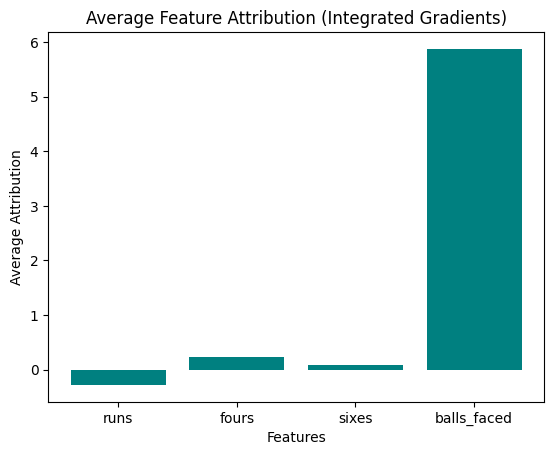

In [8]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names_bat = ['runs', 'fours', 'sixes', 'balls_faced']

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_bat)

# Reshape input to include batch dimension (1, 5, 4)
X_test_reshaped = X_test_bat.values.reshape(-1, 5, 4)
input_tensor = torch.FloatTensor(X_test_reshaped[1]).unsqueeze(0)  # Shape: [1, 5, 4]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 4])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names_bat, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.show()


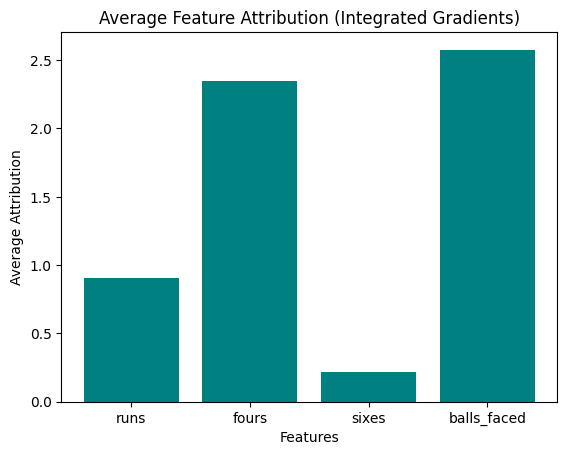

In [9]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names_bat = ['runs', 'fours', 'sixes', 'balls_faced']

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_bat)

# Reshape input to include batch dimension (1, 5, 4)
X_test_reshaped = X_test_bat.values.reshape(-1, 5, 4)
input_tensor = torch.FloatTensor(X_test_reshaped[0]).unsqueeze(0)  # Shape: [1, 5, 4]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 4])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names_bat, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.show()


## bowl

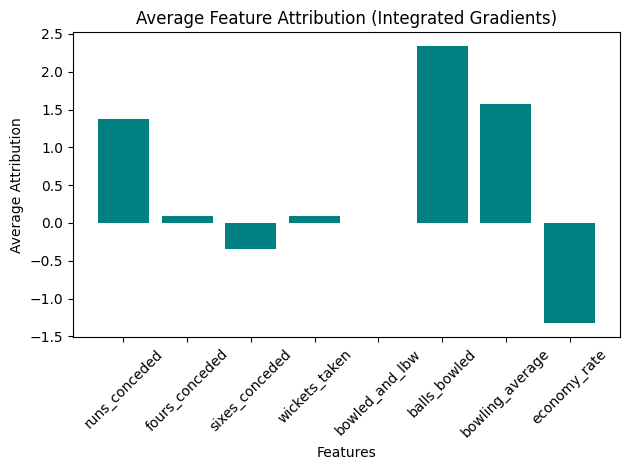

In [10]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names = [
    'runs_conceded', 'fours_conceded', 'sixes_conceded', 
    'wickets_taken', 'bowled_and_lbw', 'balls_bowled', 
    'bowling_average', 'economy_rate'
]

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_bowl)

# Reshape input to include batch dimension (1, 5, 8)
X_test_reshaped = X_test_bowl.values.reshape(-1, 5, 8)
input_tensor = torch.FloatTensor(X_test_reshaped[0]).unsqueeze(0)  # Shape: [1, 5, 8]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 8])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()


## field

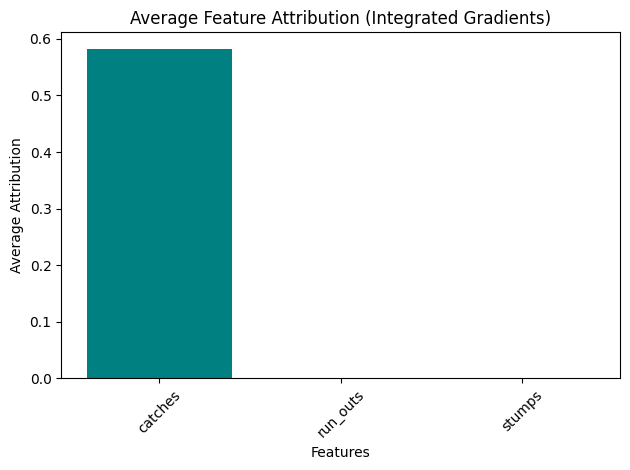

In [11]:
import torch
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt

# Feature names
feature_names = ['catches', 'run_outs', 'stumps']

# Initialize the Integrated Gradients explainer
ig = IntegratedGradients(lstm_model_field)

# Reshape input to include batch dimension (1, 5, 3)
X_test_reshaped = X_test_field.values.reshape(-1, 5, 3)
input_tensor = torch.FloatTensor(X_test_reshaped[0]).unsqueeze(0)  # Shape: [1, 5, 3]
baseline_tensor = torch.zeros_like(input_tensor)  # Same shape as input_tensor with batch dimension

# Compute Integrated Gradients
attributions, delta = ig.attribute(input_tensor, baseline_tensor, target=0, return_convergence_delta=True)

# Remove batch dimension and convert to numpy (Shape: [5, 3])
attributions_np = attributions.squeeze(0).detach().numpy()

# Calculate average attribution across time steps for each feature (axis 0 is time step)
avg_attributions = attributions_np.mean(axis=0)

# Plot the bar graph of average attributions per feature
plt.bar(feature_names, avg_attributions, color='teal')
plt.xlabel('Features')
plt.ylabel('Average Attribution')
plt.title('Average Feature Attribution (Integrated Gradients)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()       # Adjust layout to prevent label overlap
plt.show()


# Inference output

In [12]:
inference_output = context.catalog.load("inference_output")
inference_output

[12/12/24 19:42:39] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=717026;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=249415;file:///home/mayank/.local/lib/python3.10/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[12/12/24 19:42:41] INFO     Loading data from inference_output (CSVDataset)...                 ]8;id=171158;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=209954;file:///home/mayank/anaconda3/envs/ai_839/lib/python3.10/site-packages/kedro/io/data_catalog.py#539\539]8;;\

,player,role,batting_points,bowling_points,fielding_points,total_points,cost,bat_lower_bound,bat_upper_bound,bowl_lower_bound,bowl_upper_bound,field_lower_bound,field_upper_bound
0,Rahmanullah Gurbaz,allrounder,31.476032,21.130692,11.923754,64.530478,4,-13.843369,76.795433,-16.764183,59.025566,2.780657,21.066851
1,SP Narine,batsman,38.073544,8.066486,12.206563,58.346593,5,-7.245857,83.392944,-29.828388,45.961361,3.063466,21.349659
2,T Natarajan,bowler,4.056541,30.616615,12.268169,46.941326,6,-41.262859,49.375942,-7.278259,68.511490,3.125072,21.411266
3,JD Unadkat,bowler,9.133430,30.946026,12.206563,52.286019,5,-36.185970,54.452831,-6.948849,68.840897,3.063466,21.349659
4,AK Markram,bowler,0.839941,29.570778,12.206563,42.617282,3,-44.479462,46.159340,-8.324097,67.465652,3.063466,21.349659
5,VR Iyer,allrounder,28.206942,21.729481,12.355688,62.292110,5,-17.112459,73.526344,-16.165394,59.624355,3.212591,21.498785
6,Shahbaz Ahmed,batsman,34.307159,9.273854,12.206563,55.787577,7,-11.012241,79.626556,-28.621021,47.168728,3.063466,21.349659
7,B Kumar,batsman,30.122150,-1.673260,16.389153,44.838043,7,-15.197250,75.441551,-39.568134,36.221615,7.246056,25.532249
8,SS Iyer,allrounder,39.349186,29.536572,12.435587,81.321344,8,-5.970215,84.668587,-8.358303,67.431442,3.292490,21.578684
9,MA Starc,allrounder,36.596107,11.730933,15.231909,63.558949,5,-8.723293,81.915512,-26.163940,49.625809,6.088812,24.375006


In [13]:
bat_df.head()

,match_id,batter,runs,fours,sixes,balls_faced,player_team,opponent_team,strike_rate,batting_points,date,venue
0,548346,A Ashish Reddy,10,0,1,10,Deccan Chargers,Mumbai Indians,100.0,12,2012-04-29,Wankhede Stadium
1,548352,A Ashish Reddy,3,0,0,3,Deccan Chargers,Chennai Super Kings,100.0,3,2012-05-04,"MA Chidambaram Stadium, Chepauk"
2,548359,A Ashish Reddy,8,1,0,8,Deccan Chargers,Kings XI Punjab,100.0,9,2012-05-08,"Rajiv Gandhi International Stadium, Uppal"
3,548373,A Ashish Reddy,10,2,0,4,Deccan Chargers,Rajasthan Royals,250.0,12,2012-05-18,"Rajiv Gandhi International Stadium, Uppal"
4,548376,A Ashish Reddy,4,0,0,5,Deccan Chargers,Royal Challengers Bangalore,80.0,4,2012-05-20,"Rajiv Gandhi International Stadium, Uppal"


In [14]:
import mlflow
logged_model = 'runs:/4bd81d7726fc44d9a4545ef5506c4f98/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 logged_model = 'runs:/4bd81d7726fc44d9a4545ef5506c4f98/model'                                │
│   3                                                                                              │
│   4 # Load model as a PyFuncModel.                                                               │
│ ❱ 5 loaded_model = mlflow.pyfunc.load_model(logged_model)                                        │
│   6                                                                                              │
│                                                                                                  │
│ /home/mayank/.local/lib/python3.10/site-packages/mlflow/tracing/provider.py:253 in wrapper       │
│                                                                                                  │
│   250 │   │   │   if _is_enabled():                                                              │
│   251 │   │   │   │   disable()                                                                  │
│   252 │   │   │   │   try:                                                                       │
│ ❱ 253 │   │   │   │   │   is_func_called, result = True, f(*args, **kwargs)                      │
│   254 │   │   │   │   finally:                                                                   │
│   255 │   │   │   │   │   enable()                                                               │
│   256 │   │   │   else:                                                                          │
│                                                                                                  │
│ /home/mayank/.local/lib/python3.10/site-packages/mlflow/pyfunc/__init__.py:1066 in load_model    │
│                                                                                                  │
│   1063 │   │   │   │   "score_batch for offline predictions.",                                   │
│   1064 │   │   │   │   BAD_REQUEST,                                                              │
│   1065 │   │   │   ) from None                                                                   │
│ ❱ 1066 │   │   raise e                                                                           │
│   1067 │   finally:                                                                              │
│   1068 │   │   # clean up the dependencies schema which is set to global state after loading th  │
│   1069 │   │   # This avoids the schema being used by other models loaded in the same process.   │
│                                                                                                  │
│ /home/mayank/.local/lib/python3.10/site-packages/mlflow/pyfunc/__init__.py:1051 in load_model    │
│                                                                                                  │
│   1048 │   │   if model_config:                                                                  │
│   1049 │   │   │   model_impl = importlib.import_module(conf[MAIN])._load_pyfunc(data_path, mod  │
│   1050 │   │   else:                                                                             │
│ ❱ 1051 │   │   │   model_impl = importlib.import_module(conf[MAIN])._load_pyfunc(data_path)      │
│   1052 │   except ModuleNotFoundError as e:                                                      │
│   1053 │   │   # This error message is particularly for the case when the error is caused by mo  │
│   1054 │   │   # "databricks.feature_store.mlflow_model". But depending on the environment, the  │
│                                                                                                  │
│ /home/mayank/.local/lib/python3.10/site-packages/mlflow/pyf